# 1. trouver une base de données
-  https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection

# 2. Importer les bibliothèques

In [1]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import random
import cv2
import sys

# 3. Charger les images

standarize la taille 
changer bgr au rgb

In [2]:
with_tumor = []
no_tumor = []
for f in glob.iglob("./data/yes/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    with_tumor.append(img)

for f in glob.iglob("./data/no/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    no_tumor.append(img)

no_tumor = np.array(no_tumor)
with_tumor = np.array(with_tumor)
data = np.concatenate((with_tumor, no_tumor))

visualiser la taille de notre base de données

In [4]:
data.shape

(245, 128, 128, 3)

# 4. explorer les images

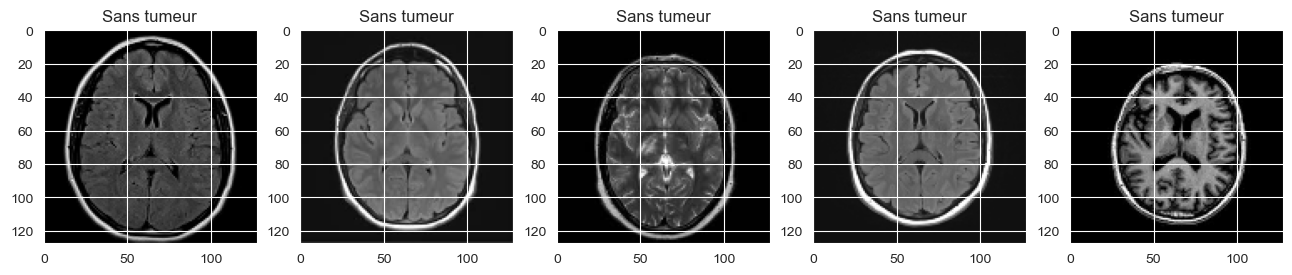

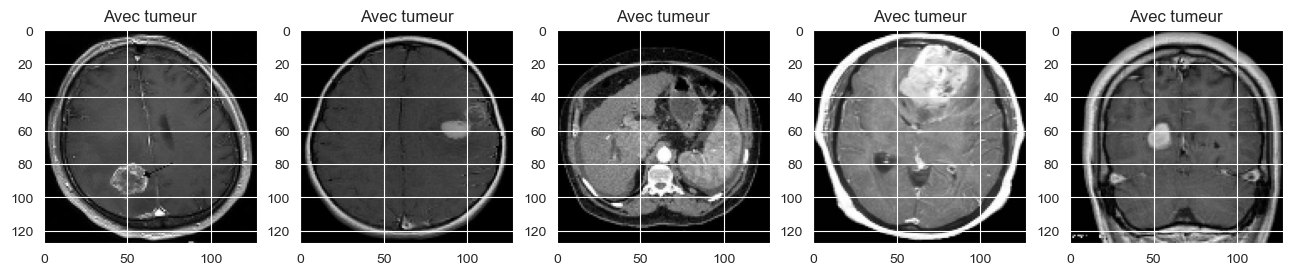

In [9]:
num_sample=5
no_tumor_imgs = no_tumor[np.random.choice(no_tumor.shape[0], num_sample, replace=False)]
with_tumor_imgs = with_tumor[np.random.choice(with_tumor.shape[0], num_sample, replace=False)]

plt.figure(figsize=(16,9))
for i in range(num_sample):
    plt.subplot(1, num_sample, i+1)
    plt.title('Sans tumeur')
    plt.imshow(no_tumor_imgs[i])

plt.figure(figsize=(16,9))
for i in range(num_sample):
    plt.subplot(1, num_sample, i+1)
    plt.title('Avec tumeur')
    plt.imshow(with_tumor_imgs[i])